# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

station             valid  tmpc  dwpc   relh  sknt  gust  peak_wind_drct
0     NZAA  2015-01-01 00:00  21.0  11.0  52.77  15.0   NaN             NaN
1     NZAA  2015-01-01 00:30  21.0  10.0  49.37  16.0   NaN             NaN
2     NZAA  2015-01-01 01:00  21.0  12.0  56.38  16.0   NaN             NaN
3     NZAA  2015-01-01 01:30  21.0  13.0  60.21  16.0   NaN             NaN
4     NZAA  2015-01-01 02:00  21.0  12.0  56.38  16.0   NaN             NaN

In [3]:
# Example description.
# Mean - Average value of the data.
# std (Standard Deviation) - How far away from the mean is the overall data?
# 25% - The 25th percentile value.
# 50% - Median.
# 75% - The 75th percentile value.

dataset.describe()

tmpc           dwpc           relh           sknt  \
count  103678.000000  103678.000000  103593.000000  103704.000000   
mean       15.811503      12.115772      79.782307       8.919029   
std         4.235197       3.738005      12.562199       5.348379   
min         2.000000      -2.000000      29.230000       0.000000   
25%        13.000000       9.000000      71.450000       5.000000   
50%        16.000000      12.000000      81.990000       8.000000   
75%        19.000000      15.000000      88.180000      12.000000   
max        29.000000      23.000000     100.000000      42.000000   

              gust  peak_wind_drct  
count  1203.000000             0.0  
mean     30.962594             NaN  
std       6.319510             NaN  
min      13.000000             NaN  
25%      27.000000             NaN  
50%      31.000000             NaN  
75%      35.000000             NaN  
max      56.000000             NaN

In [4]:
# Check that there are no null-values.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

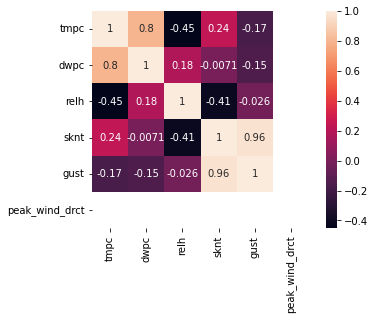

In [5]:
# Example correlation plot.
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to -1 indicates the plot of a(x) and b(x) has no noticeable pattern.

sns.heatmap(dataset.corr(), annot=True, square=True)

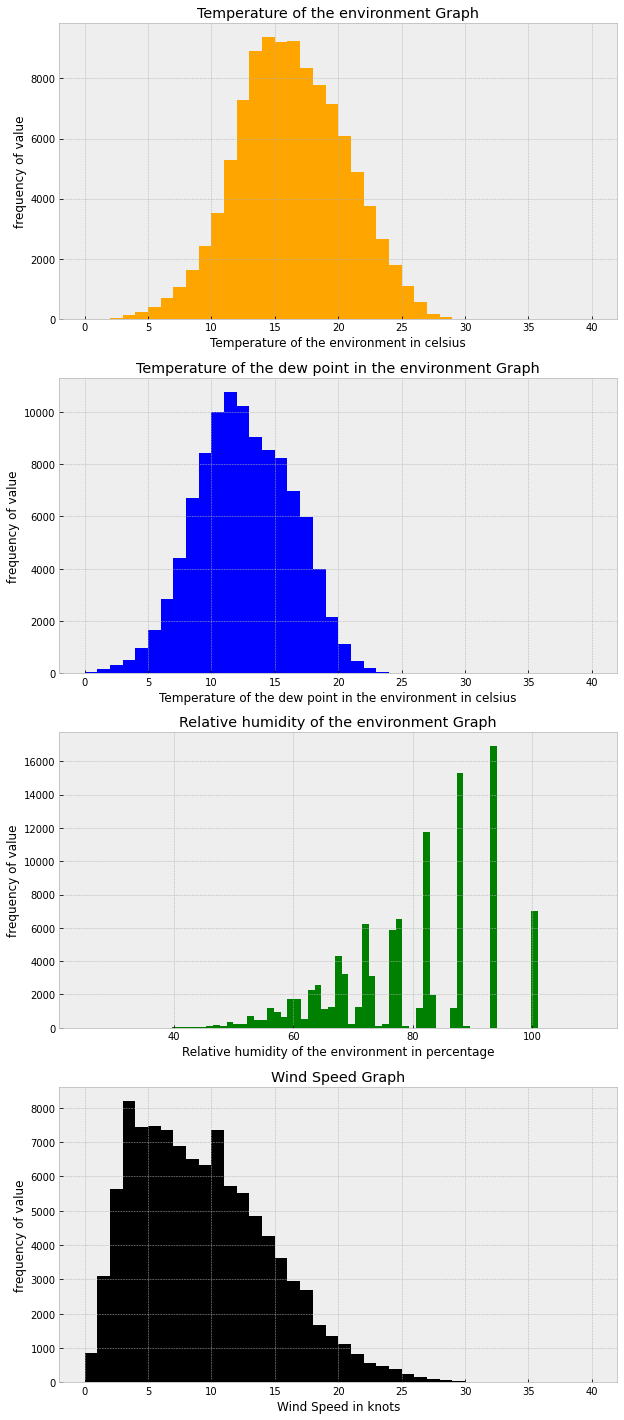

In [6]:
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, squeeze=True)

ax1.hist(dataset["tmpc"], 40, (0,40), color="orange", histtype = "bar", rwidth = 1)
ax1.set_title("Temperature of the environment Graph")
ax1.set_xlabel("Temperature of the environment in celsius")
ax1.set_ylabel("frequency of value")

ax2.hist(dataset["dwpc"], 40, (0,40), color="blue", histtype = "bar", rwidth = 1)
ax2.set_title("Temperature of the dew point in the environment Graph")
ax2.set_xlabel("Temperature of the dew point in the environment in celsius")
ax2.set_ylabel("frequency of value")

ax3.hist(dataset["relh"], 75, (25,110), color="green", histtype = "bar", rwidth = 1)
ax3.set_title("Relative humidity of the environment Graph")
ax3.set_xlabel("Relative humidity of the environment in percentage")
ax3.set_ylabel("frequency of value")

ax4.hist(dataset["sknt"], 40, (0,40), color="black", histtype = "bar", rwidth = 1)
ax4.set_title("Wind Speed Graph")
ax4.set_xlabel("Wind Speed in knots")
ax4.set_ylabel("frequency of value")

fig.set_size_inches(10,25)

fig.show()

Temperature of the environment Graph:
- the data is normally distruibted
- mean of 15.8 degrees celsius
- min of 2 degrees celsius and max of 29 degrees celsius

Temperature of the dew point in the environment Graph:
- the data is normally distruibted
- mean of 12 degrees celsius
- min of -2 degrees celsius and max of 23 degrees celsius

Relative humidity of the environment Graph:
- the data is very left skewed
- median of 82% relative humidity
- min of 29% and max of 100% relative humidity

Wind Speed Graph:
- the data is very right skewed
- median of 8 knots
- min of 0 knots and max 42 knots

# Data Processing

In [8]:
# I removed the columns "peak_wind_drct", "gust", " station", "valid" as they were mostly empty this was true for "peak_wind_drct", "gust".
# I removed " station" as it was useless infromation and I removed "valid" as it could not be used by my model and replaced it with minutesFromStart 
# which is the number of minutes since the first value was taken this value is reset each year to 0

dataset.drop(columns=["peak_wind_drct", "gust", " station", "valid"], inplace=True)
dataset.head()

tmpc  dwpc   relh  sknt
0  21.0  11.0  52.77  15.0
1  21.0  10.0  49.37  16.0
2  21.0  12.0  56.38  16.0
3  21.0  13.0  60.21  16.0
4  21.0  12.0  56.38  16.0

In [9]:
minutesFromStart = []
graphMinutesFromStart = []

# make a list that has the number of minutes since the first recording was taken
# every row/data point recorded was taken 30 minutes after the last one was taken
value = 0

for i in range(len(dataset["tmpc"])):
    if value == 525600:
        value = 0
    else:
        value = value + 30
    
    minutesFromStart.append(value)

# this array does not reset its minutes from start value each year so it can be used in the graph
for i in range(len(dataset["tmpc"])):
    graphMinutesFromStart.append(float(i*30))


In [10]:
graphTestSet = dataset[:]

# add our new time component so the model can predict with respect to time
dataset.insert(0,'Minutes From Start', minutesFromStart )

# add our new time component so the model can predict with respect to time
graphTestSet.insert(0,'Minutes From Start', graphMinutesFromStart )

dataset.head()

Minutes From Start  tmpc  dwpc   relh  sknt
0                  30  21.0  11.0  52.77  15.0
1                  60  21.0  10.0  49.37  16.0
2                  90  21.0  12.0  56.38  16.0
3                 120  21.0  13.0  60.21  16.0
4                 150  21.0  12.0  56.38  16.0

In [11]:
# check data
# data set has null values/ missing data
dataset.info()
print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Minutes From Start  103713 non-null  int64  
 1   tmpc                103678 non-null  float64
 2   dwpc                103678 non-null  float64
 3   relh                103593 non-null  float64
 4   sknt                103704 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.0 MB
        Minutes From Start  tmpc  dwpc   relh  sknt
0                       30  21.0  11.0  52.77  15.0
1                       60  21.0  10.0  49.37  16.0
2                       90  21.0  12.0  56.38  16.0
3                      120  21.0  13.0  60.21  16.0
4                      150  21.0  12.0  56.38  16.0
...                    ...   ...   ...    ...   ...
103708              483120  19.0  14.0  72.74   5.0
103709              483150  19.0  14.0  72.74   6.0
103710              48

In [12]:
# create a zoomed in version of the data to graph
graphTestSetAll = graphTestSet[:]
graphTestSet.drop(graphTestSet.index[5000:], inplace=True)
print(graphTestSet)

      Minutes From Start  tmpc  dwpc   relh  sknt
0                    0.0  21.0  11.0  52.77  15.0
1                   30.0  21.0  10.0  49.37  16.0
2                   60.0  21.0  12.0  56.38  16.0
3                   90.0  21.0  13.0  60.21  16.0
4                  120.0  21.0  12.0  56.38  16.0
...                  ...   ...   ...    ...   ...
4995            149850.0  14.0  11.0  82.12   7.0
4996            149880.0  15.0  11.0  76.98   6.0
4997            149910.0  14.0  11.0  82.12   5.0
4998            149940.0  14.0  11.0  82.12   4.0
4999            149970.0  14.0  11.0  82.12   3.0

[5000 rows x 5 columns]


In [13]:
from sklearn.model_selection import train_test_split

# there were some empty data cells that would give null values so I filled them with values so the model could work and make sure there are no runtime errors
dataset.fillna(0, inplace=True)

# split the data set into training and testing datasets for the model train and test on
X_train, X_test, y_train, y_test = train_test_split(
   dataset[["Minutes From Start"]], dataset[["tmpc", "dwpc", "relh", "sknt"]], test_size=0.2
)

# check data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 53237 to 92604
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Minutes From Start  82970 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 5787 to 91870
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Minutes From Start  20743 non-null  int64
dtypes: int64(1)
memory usage: 324.1 KB


In [15]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 53237 to 92604
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82970 non-null  float64
 1   dwpc    82970 non-null  float64
 2   relh    82970 non-null  float64
 3   sknt    82970 non-null  float64
dtypes: float64(4)
memory usage: 3.2 MB


In [16]:
y_test.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 5787 to 91870
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    20743 non-null  float64
 1   dwpc    20743 non-null  float64
 2   relh    20743 non-null  float64
 3   sknt    20743 non-null  float64
dtypes: float64(4)
memory usage: 810.3 KB


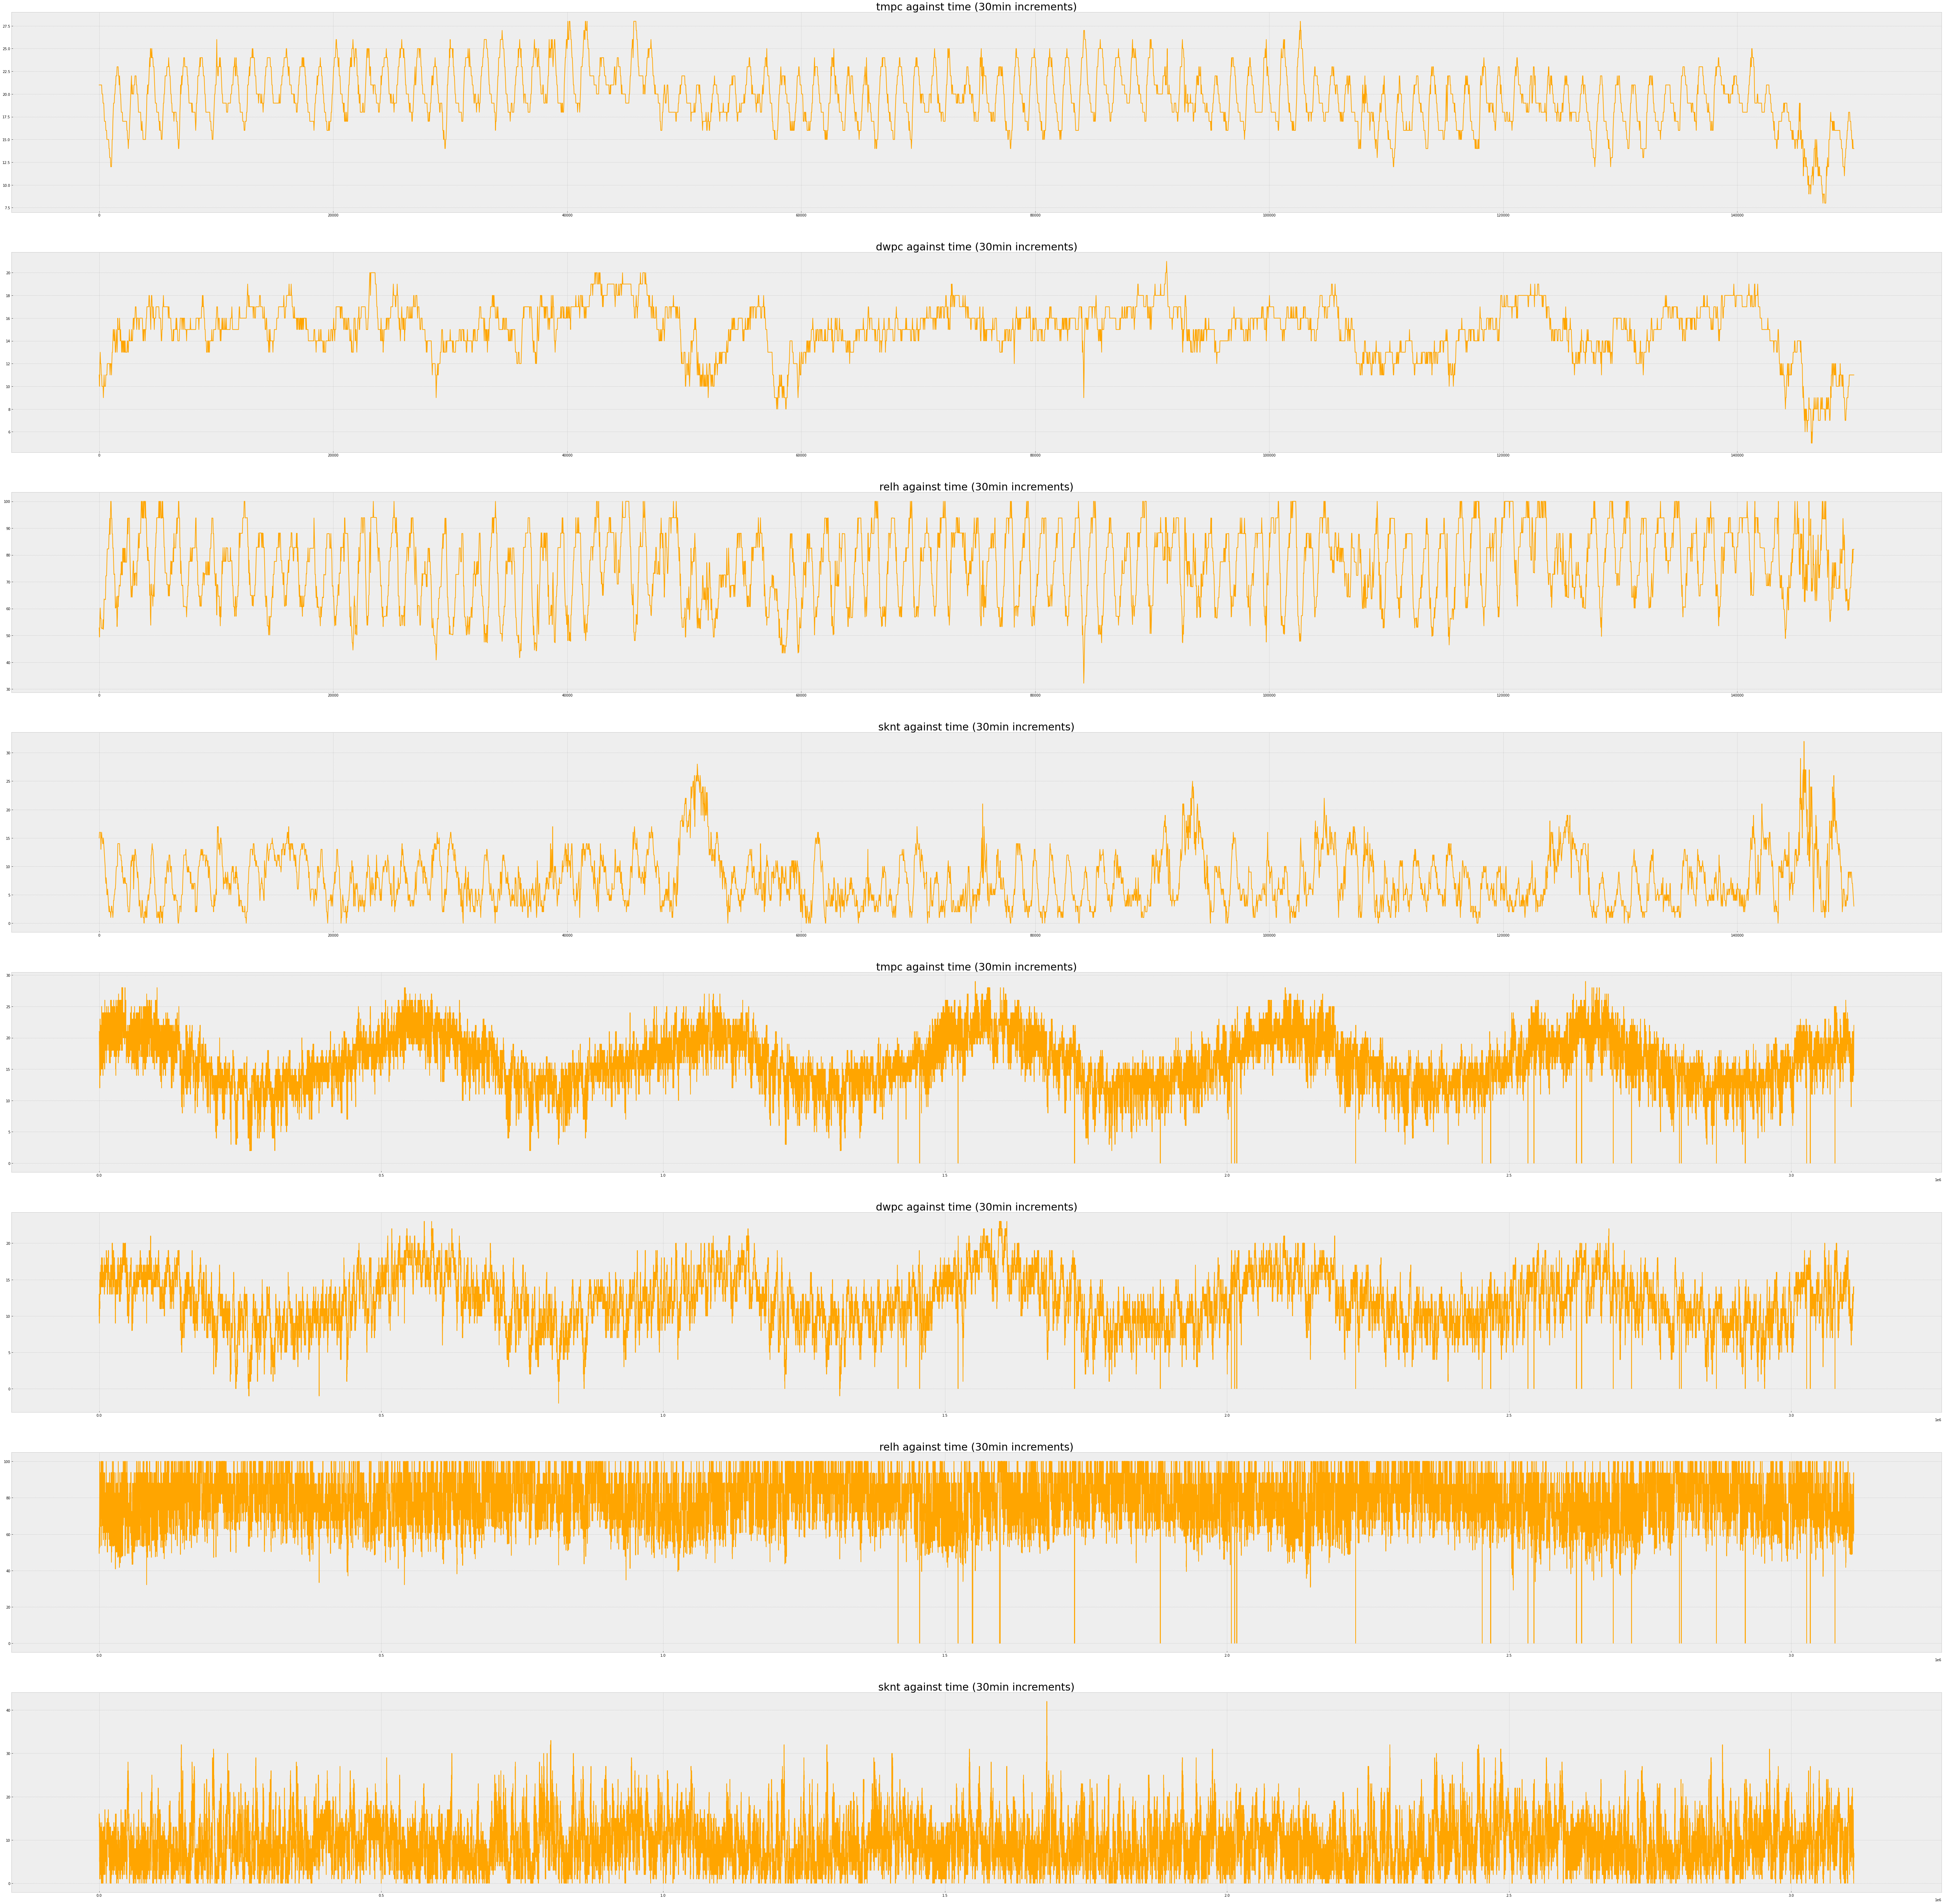

In [17]:
# the graphs show a sinusoidal pattern reflecting the day and night cycles and the yearly season cycles

plt.style.use("bmh")
fig1, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=8, ncols=1)

ax1.plot(graphTestSet["Minutes From Start"], graphTestSet["tmpc"], color="orange")
ax1.set_title("tmpc against time (30min increments)", size = 30)

ax2.plot(graphTestSet["Minutes From Start"], graphTestSet["dwpc"], color="orange")
ax2.set_title("dwpc against time (30min increments)", size = 30)

ax3.plot(graphTestSet["Minutes From Start"], graphTestSet["relh"], color="orange")
ax3.set_title("relh against time (30min increments)", size = 30)

ax4.plot(graphTestSet["Minutes From Start"], graphTestSet["sknt"], color="orange")
ax4.set_title("sknt against time (30min increments)", size = 30)

ax5.plot(graphTestSetAll["Minutes From Start"], graphTestSetAll["tmpc"], color="orange")
ax5.set_title("tmpc against time (30min increments)", size = 30)

ax6.plot(graphTestSetAll["Minutes From Start"], graphTestSetAll["dwpc"], color="orange")
ax6.set_title("dwpc against time (30min increments)", size = 30)

ax7.plot(graphTestSetAll["Minutes From Start"], graphTestSetAll["relh"], color="orange")
ax7.set_title("relh against time (30min increments)", size = 30)

ax8.plot(graphTestSetAll["Minutes From Start"], graphTestSetAll["sknt"], color="orange")
ax8.set_title("sknt against time (30min increments)", size = 30)

fig1.set_size_inches(100,100)

fig1.show()

# Data Modelling

In [18]:
from sklearn.neighbors import KNeighborsRegressor
Neighbor_model = KNeighborsRegressor(n_neighbors=3)

Neighbor_model.fit(X_train, y_train)

Neighbor_model.score( X_test, y_test)

0.018060913520485417

In [19]:
monthPredictDataset = []

# last minute value given from data this is the starting point for the next month that the model must predict
value = 483240

# create the next month of minute values the model must predict for
for i in range(2*24*32):
    if value == 525600:
        value = 0
    else:
        monthPredictDataset.append(value)
        value = value + 30

monthTestSet2 = pd.DataFrame(monthPredictDataset, columns=["0"])

test_preds = Neighbor_model.predict(monthTestSet2)
dfmon = pd.DataFrame(test_preds, columns=["0","1","2","3"])
dfmon.insert(0, 'monthPredictDataset', monthPredictDataset)


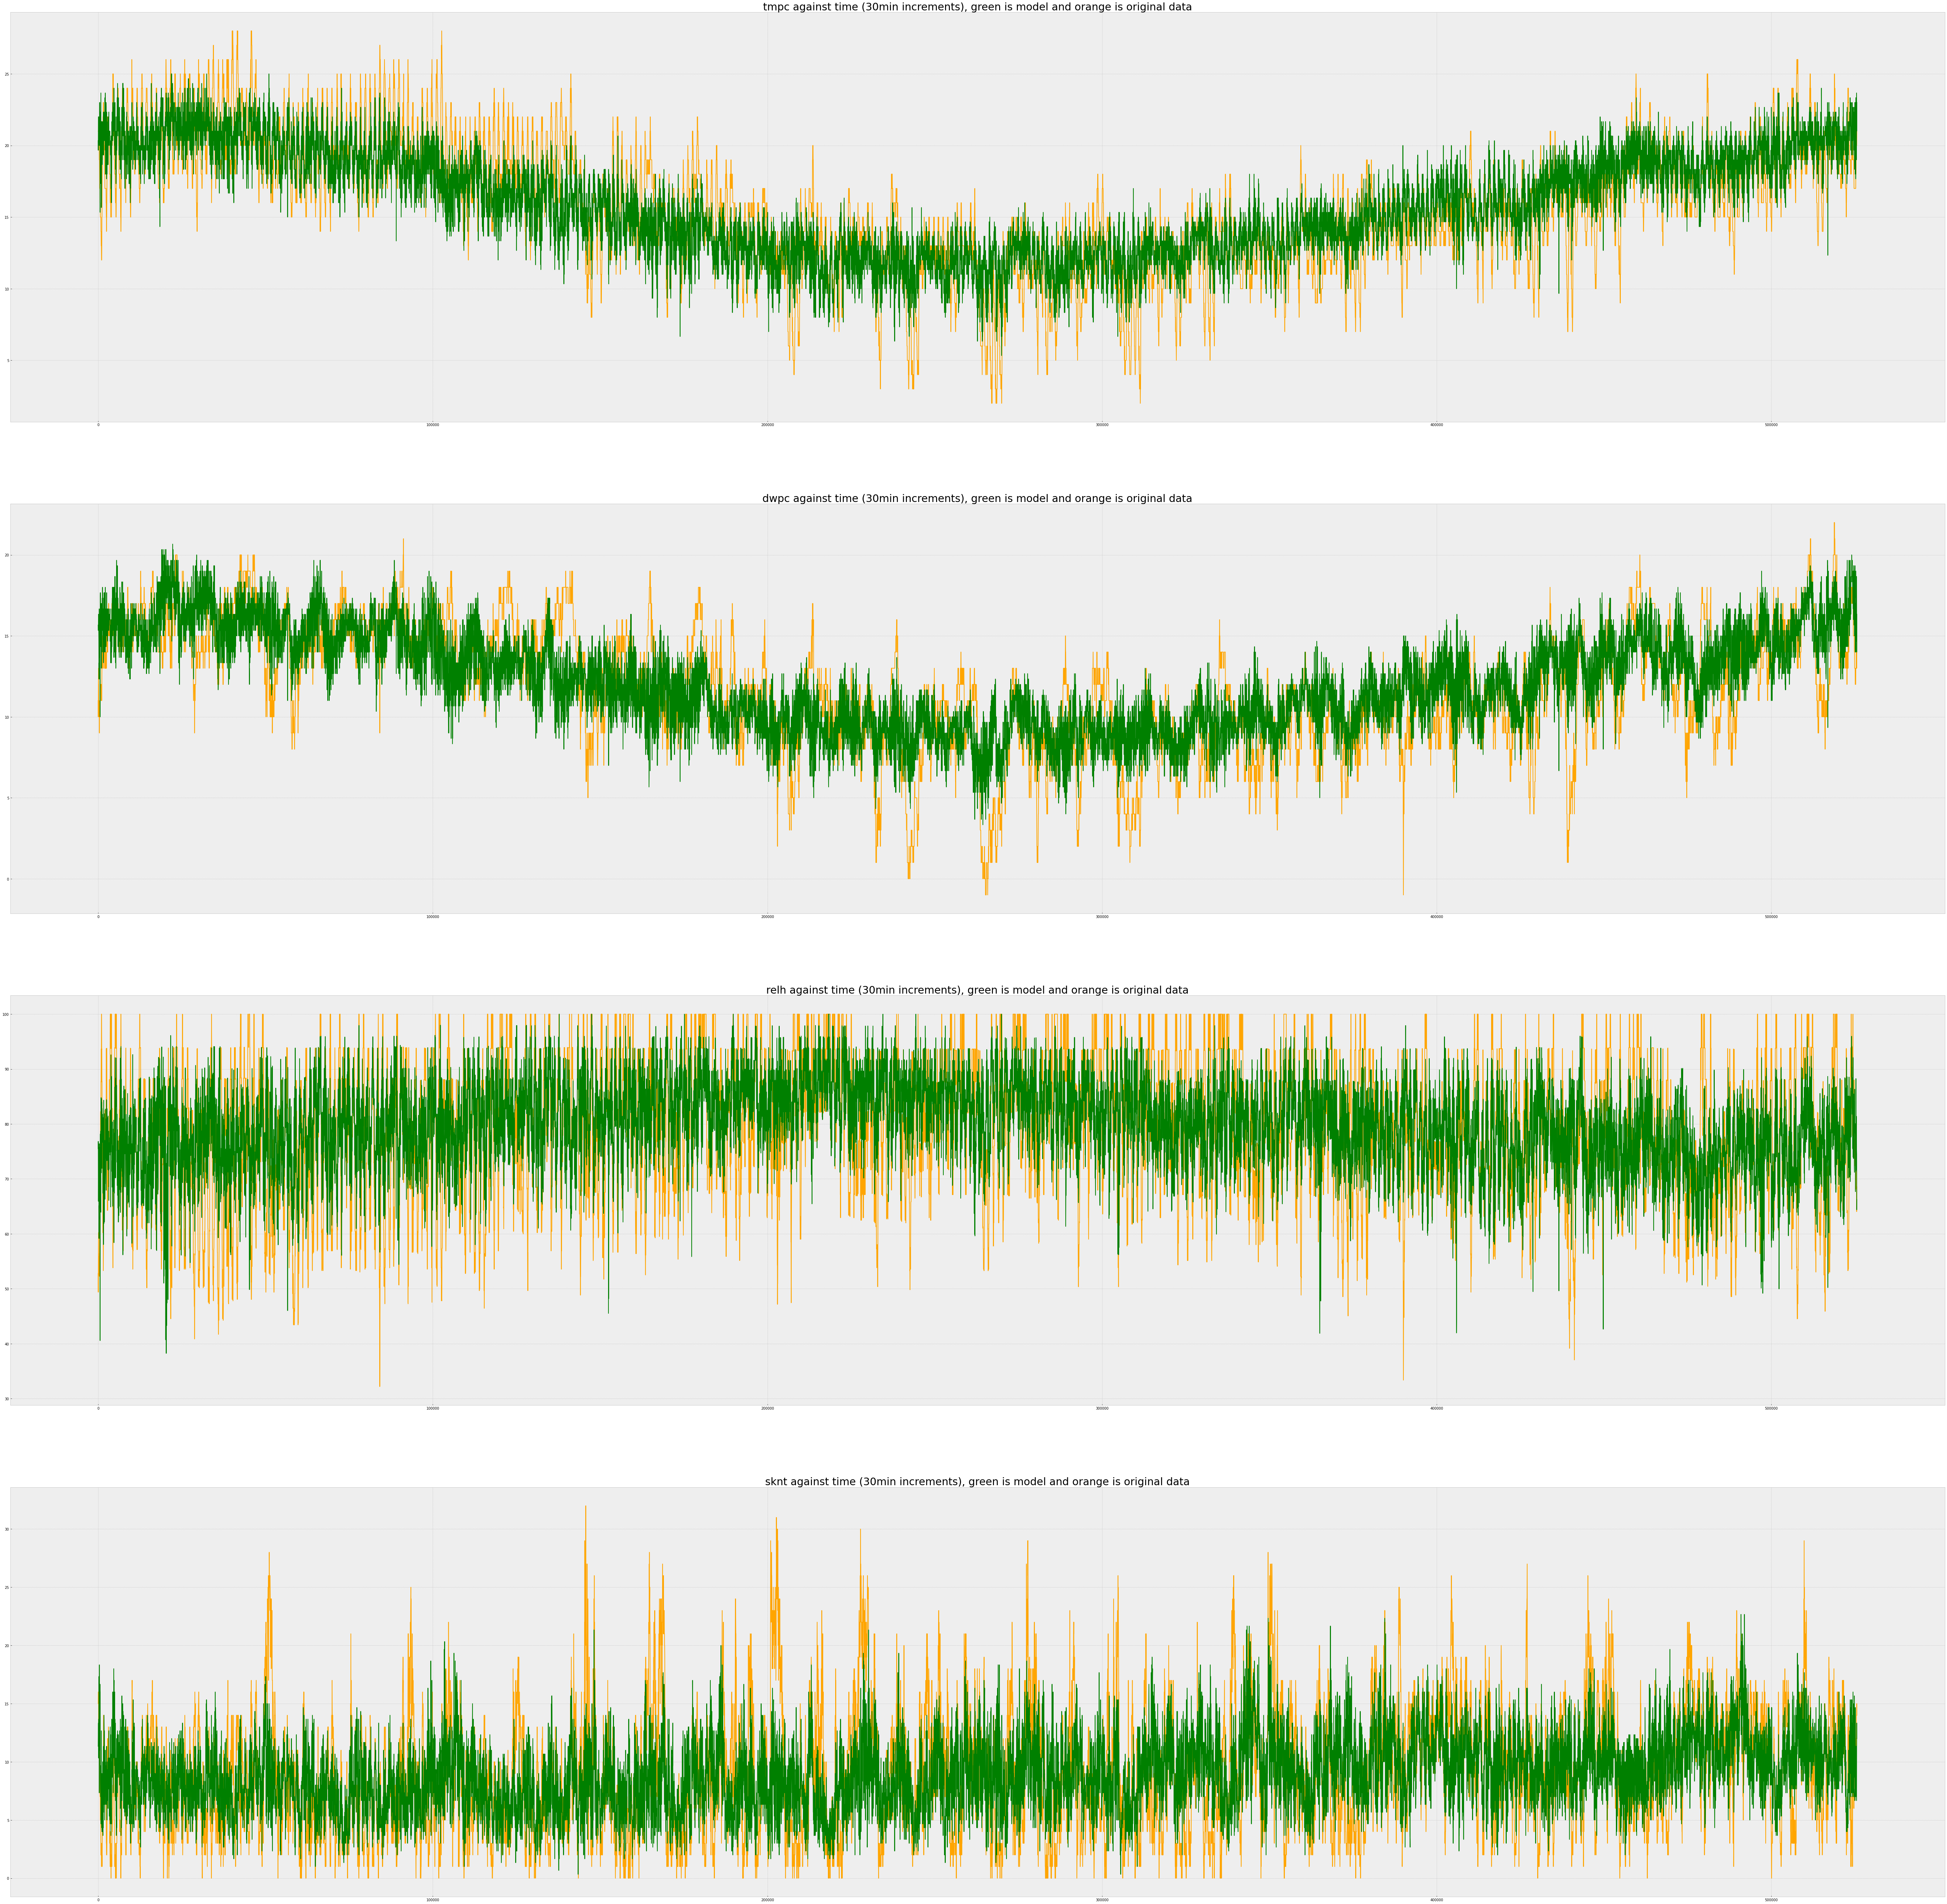

In [20]:
monthPredictDatasetGraph = []

for i in range(17520):
    monthPredictDatasetGraph.append(float(i*30))

monthTestSetGraph = pd.DataFrame(monthPredictDatasetGraph, columns=["0"])

test_preds_graph = Neighbor_model.predict(monthTestSetGraph)
dfmonGraph = pd.DataFrame(test_preds_graph, columns=["0","1","2","3"])
dfmonGraph.insert(0, 'monthPredictDataset',  monthPredictDatasetGraph)

graphTestSetAll.drop(graphTestSetAll.index[17520:], inplace=True)

plt.style.use("bmh")
fig1, (ax5, ax6, ax7, ax8) = plt.subplots(nrows=4, ncols=1)

ax5.plot(graphTestSetAll["Minutes From Start"], graphTestSetAll["tmpc"], color="orange")
ax5.set_title("tmpc against time (30min increments), green is model and orange is original data", size = 30)
ax5.plot(dfmonGraph["monthPredictDataset"], dfmonGraph["0"], color="green", )

ax6.plot(graphTestSetAll["Minutes From Start"], graphTestSetAll["dwpc"], color="orange")
ax6.set_title("dwpc against time (30min increments), green is model and orange is original data", size = 30)
ax6.plot(dfmonGraph["monthPredictDataset"], dfmonGraph["1"], color="green", )

ax7.plot(graphTestSetAll["Minutes From Start"], graphTestSetAll["relh"], color="orange")
ax7.set_title("relh against time (30min increments), green is model and orange is original data", size = 30)
ax7.plot(dfmonGraph["monthPredictDataset"], dfmonGraph["2"], color="green", )

ax8.plot(graphTestSetAll["Minutes From Start"], graphTestSetAll["sknt"], color="orange")
ax8.set_title("sknt against time (30min increments), green is model and orange is original data", size = 30)
ax8.plot(dfmonGraph["monthPredictDataset"], dfmonGraph["3"], color="green", )

fig1.set_size_inches(100,100)

fig1.show()

In [21]:

for i in range(1535):
    if i >= 1412:
        dfmon.at[i, "monthPredictDataset"] = 525570 + dfmon._get_value(i, "monthPredictDataset")
    

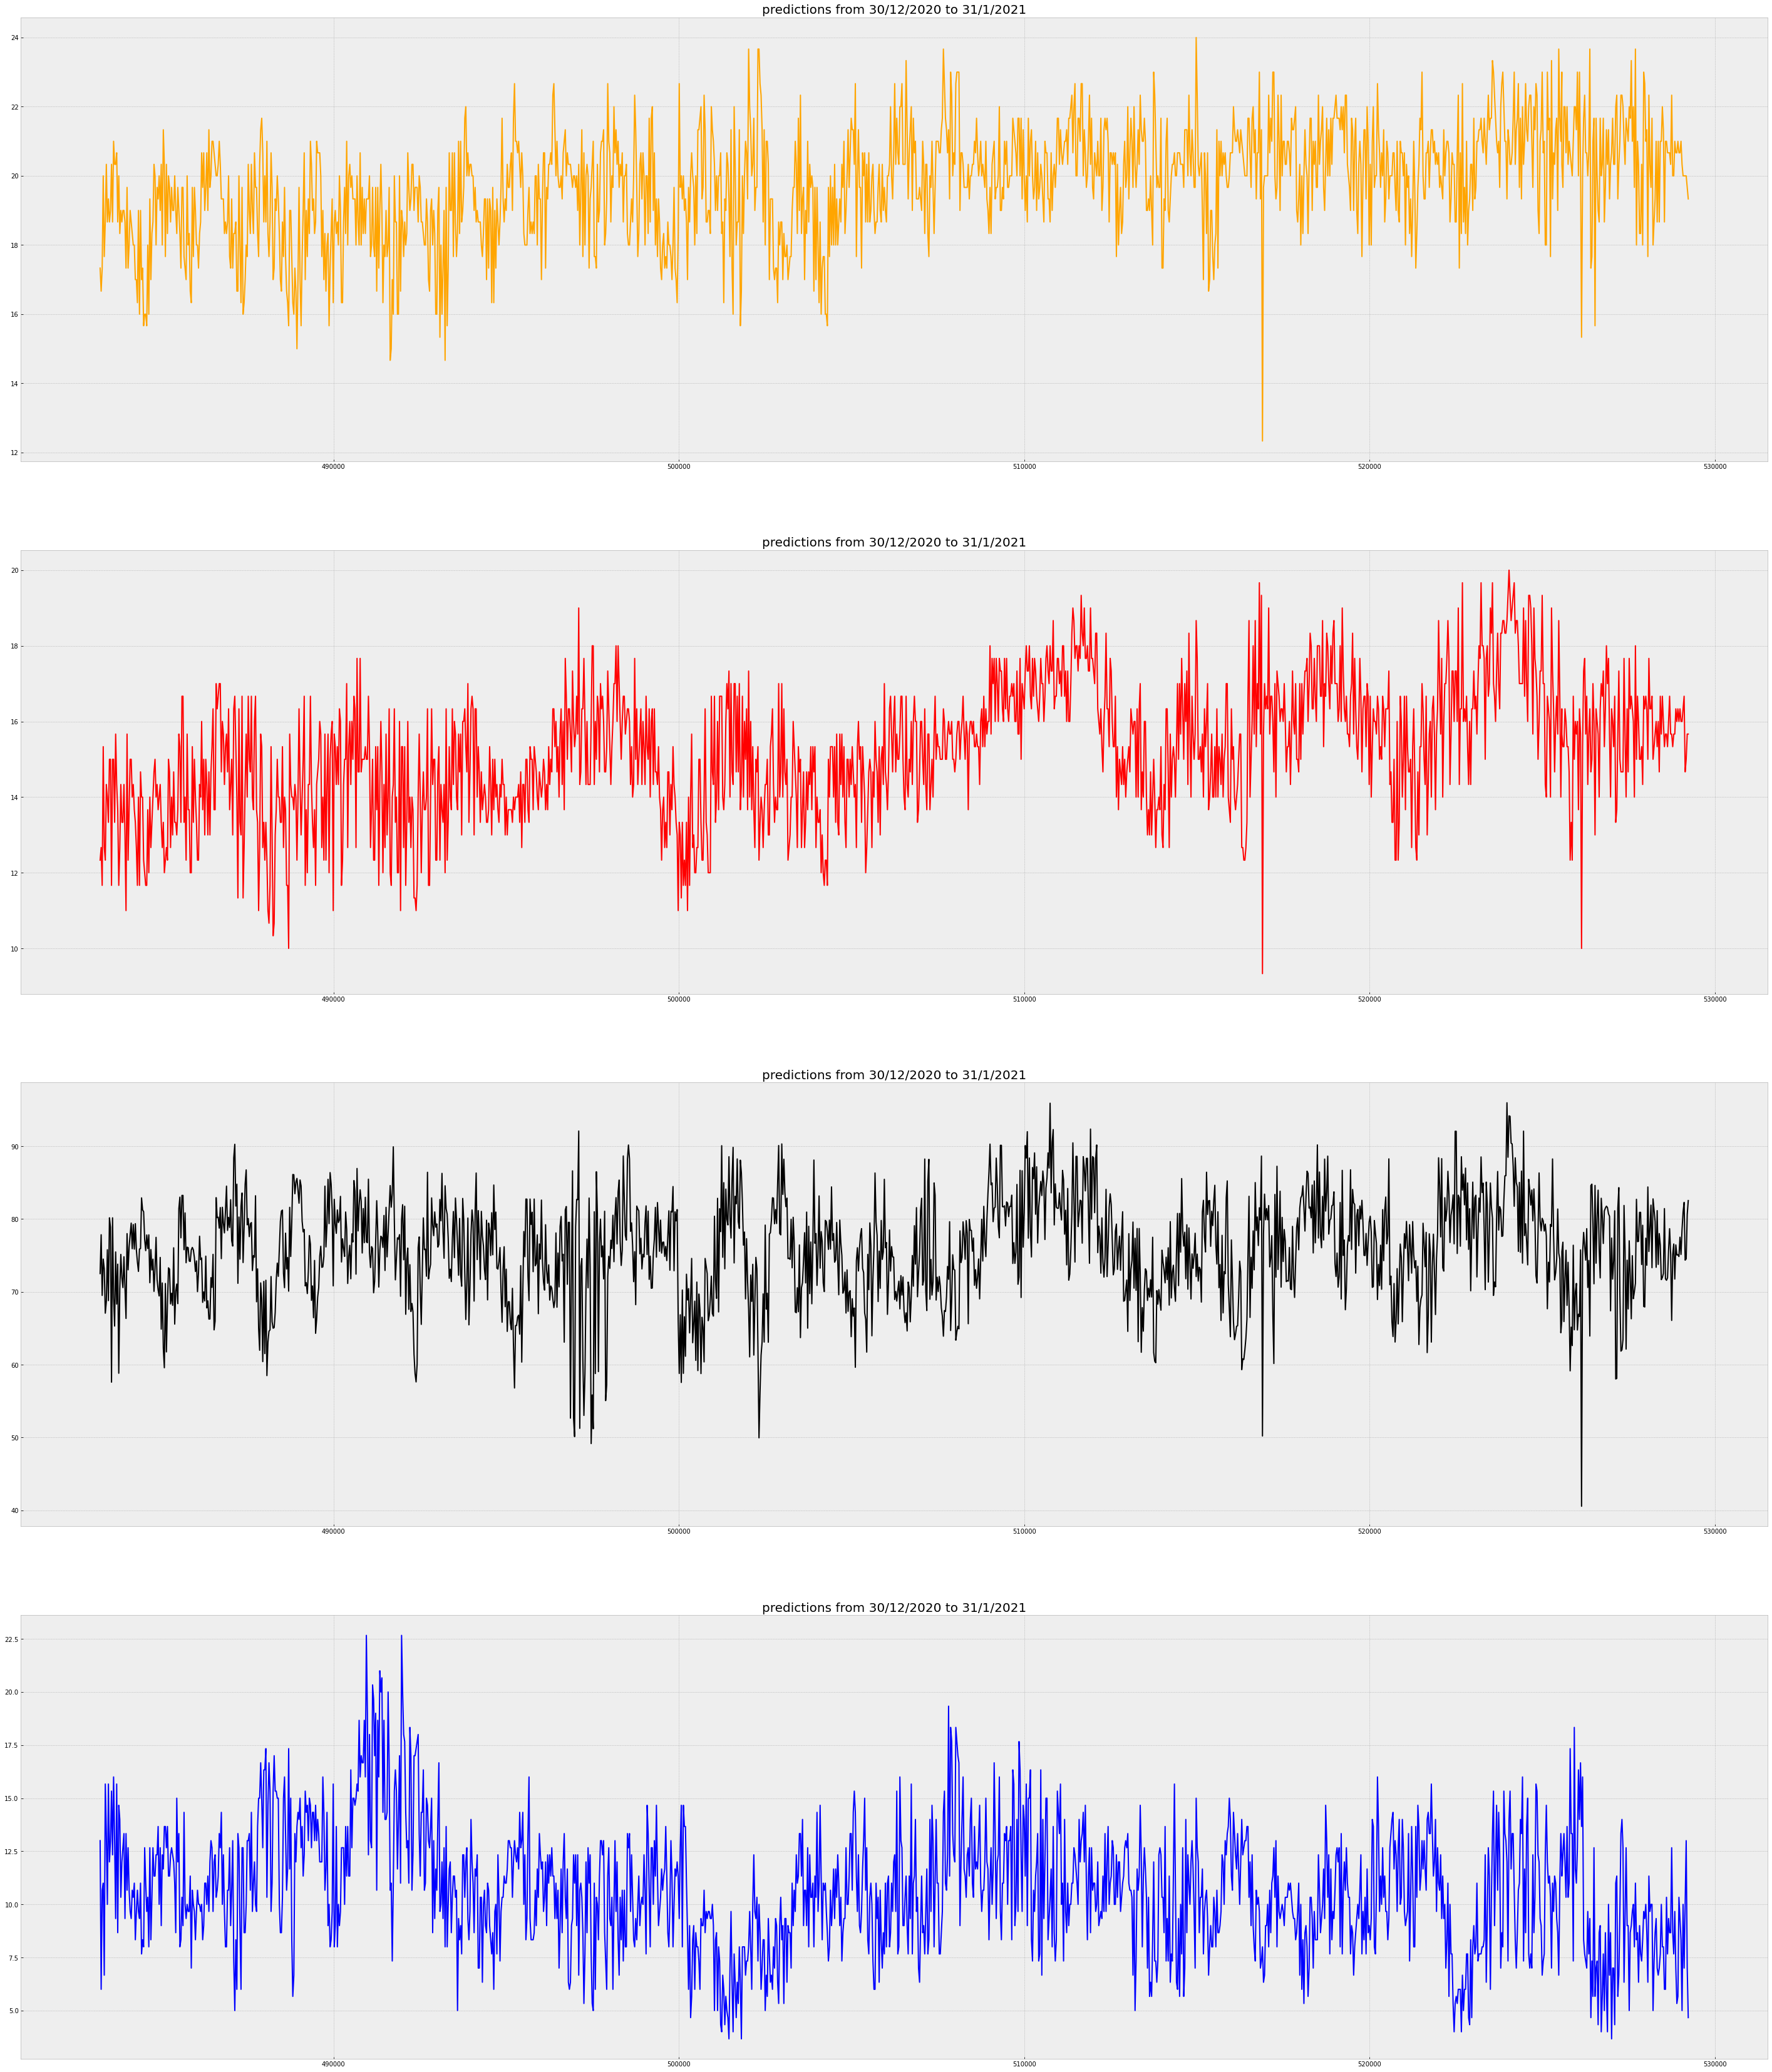

In [22]:
plt.style.use("bmh")
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)

ax1.plot(dfmon["monthPredictDataset"], dfmon["0"], color="orange")
ax1.set_title("predictions from 30/12/2020 to 31/1/2021", size = 20)

ax2.plot(dfmon["monthPredictDataset"], dfmon["1"], color="red")
ax2.set_title("predictions from 30/12/2020 to 31/1/2021", size = 20)

ax3.plot(dfmon["monthPredictDataset"], dfmon["2"], color="black")
ax3.set_title("predictions from 30/12/2020 to 31/1/2021", size = 20)

ax4.plot(dfmon["monthPredictDataset"], dfmon["3"], color="blue")
ax4.set_title("predictions from 30/12/2020 to 31/1/2021", size = 20)

fig1.set_size_inches(50,60)

fig1.show()

# Conclusion

I used the nearest neighbors model due to the data having a detailed sinusoidal pattern reflecting the day and night cycles and the yearly season cycles.

This model had a model score of 0.022814 this is decent due to the number of data points there are and how many datapoints were recorded each day. This low score is also due to the model being able to predict into the future as it uses a yearly prediction averaged from the years data was taken. Hence the model should be an average of the 5 or so years compiled. This makes the model not as useful for predicting very acurate day to day values but it still follows the general pattern and is still semi acurate. However the model would be better suited for predicting the general changes in weather over weeks and months.

The one month prediction follows the same day night pattern seen in the raw data making its prediction seem more reliable.

A point to note is that the model is only predicting the tmpc, dwpc, relh and sknt based on the time hence the average of values of tmpc, dwpc, relh and sknt in prervious years the model can predict the day and night cycles well and the seasonal cyles well but cannot take into accout other factors that many give indications to weather changes.

The model may have been overfitted however if the model was not this detailed we would have lost information and more acurate predictions based on the time of day due to the model taking into account day and night cycle changes to the modeled values. It is important to relize that the weather is very complicated to predict and just using predictions for values based purely on what the were in previous years is not enough to get a acurate weather reading. That is why if I were to do anything different I would train the model in relation to time and the other varibles to make better predictions as all the varibles are likely corrrolated with eachother.